## Model Training

#### 1.0 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### 1.1 Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### 1.2 Adding columns for "current_year"

In [4]:
df['current_year'] = 2023

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


#### 1.3 perform simple arithmetics
 - subtract current year from the year given to get the age of the car

In [6]:
df['car_age'] = df['current_year'] - df['Year']

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


#### 1.4 Droping columns for "Current_year" and "Year"
 - Drop current_year columns 
 - Drop Year columns

In [8]:
df = df.drop(['current_year'],axis=1)

In [9]:
df = df.drop(['Year'],axis=1)

In [10]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


#### 1.5 Droping columns for "Car_Name"

In [11]:
df = df.drop(['Car_Name'],axis=1)

In [12]:
df.to_csv(r"C:\Users\PASCAL\Car_Price_Predictions\notebook\CAR_data.csv", index = None, header = True)

## 2.0 Exploring Data
 - define numerical_feature & 
 - categorical_feature columns

In [21]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'car_age']

We have 3 categorical features : ['Fuel_Type', 'Seller_Type', 'Transmission']


#### 2.1 Performing OneHotEncoding on dataset
 - using dummies varable

In [22]:
final_dataset = pd.get_dummies(df, drop_first = True)

In [23]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


#### 2.1 Training of data into X & Y 


In [ ]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [64]:
X


array([[-0.23621461, -0.25622446, -0.17450057, ...,  0.50932723,
        -0.73728539,  0.39148015],
       [ 0.22150462,  0.1559105 , -0.17450057, ..., -1.96337432,
        -0.73728539,  0.39148015],
       [ 0.25742689, -0.77396901, -0.17450057, ...,  0.50932723,
        -0.73728539,  0.39148015],
       ...,
       [ 0.39068691,  1.31334003, -0.17450057, ...,  0.50932723,
        -0.73728539,  0.39148015],
       [ 0.56450434, -0.7198763 , -0.17450057, ..., -1.96337432,
        -0.73728539,  0.39148015],
       [-0.20029235, -0.81095812, -0.17450057, ...,  0.50932723,
        -0.73728539,  0.39148015]])

In [65]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## 3.0 Performing Feature Engineering
 - feature importances

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.36706086 0.04533091 0.00183247 0.07447099 0.2404551  0.00594804
 0.12919097 0.13571064]


#### 3.1 feature importances visualization

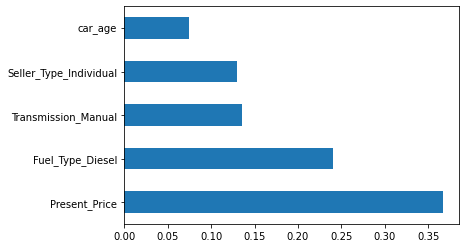

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#### 3.2 Create Column Transformer with 3 types of transformers
 - numeri_transformer
 - OneHotEncoder_transformer
 - preprocessor_transformer

In [28]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [29]:
X = preprocessor.fit_transform(X)

In [30]:
X.shape

(301, 8)

In [31]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

#### 3.3 separate dataset into train and test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((240, 8), (61, 8))

## 4.0 Create an Evaluate Function to give all metrics after model Training

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### 4.1 Building of the best_fit model by putting some set of model to test

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.7157
- Mean Absolute Error: 1.1676
- R2 Score: 0.8887
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8652
- Mean Absolute Error: 1.2162
- R2 Score: 0.8490


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.3999
- Mean Absolute Error: 1.6008
- R2 Score: 0.7821
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.7121
- Mean Absolute Error: 1.9402
- R2 Score: 0.6807


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.7159
- Mean Absolute Error: 1.1698
- R2 Score: 0.8886
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8679
- Mean Absolute Error: 1.2165
- R2 Score: 0.8485


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.5044
- Mean Absolute Error: 0.7621
- R2 Score: 0.9144
-----------------------

#### 4.2 Result

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.969250
5,Random Forest Regressor,0.962984
6,XGBRegressor,0.951222
3,K-Neighbors Regressor,0.943620
4,Decision Tree,0.937752
8,AdaBoost Regressor,0.930387
0,Linear Regression,0.848981
2,Ridge,0.848541
1,Lasso,0.680679


 - from the above test CatBoosRegressor has the highest R2_score follow by RandomForestRegressor

#### 4.3 Using CatBoostRegressor for our model

In [61]:
catboost = CatBoostRegressor(iterations =100, learning_rate=1, depth=2)
catboost = catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

0:	learn: 2.8508842	total: 488us	remaining: 48.3ms
1:	learn: 2.1467814	total: 1.08ms	remaining: 53ms
2:	learn: 1.9107487	total: 1.46ms	remaining: 47.2ms
3:	learn: 1.8029194	total: 1.84ms	remaining: 44.1ms
4:	learn: 1.7382245	total: 2.31ms	remaining: 43.8ms
5:	learn: 1.6180034	total: 2.81ms	remaining: 44ms
6:	learn: 1.5254939	total: 3.37ms	remaining: 44.7ms
7:	learn: 1.2974105	total: 3.75ms	remaining: 43.2ms
8:	learn: 1.2160209	total: 4.14ms	remaining: 41.8ms
9:	learn: 1.1793740	total: 4.62ms	remaining: 41.6ms
10:	learn: 1.1191764	total: 5.09ms	remaining: 41.2ms
11:	learn: 1.0437376	total: 5.46ms	remaining: 40ms
12:	learn: 0.9900272	total: 5.87ms	remaining: 39.3ms
13:	learn: 0.9762792	total: 6.25ms	remaining: 38.4ms
14:	learn: 0.9198364	total: 6.65ms	remaining: 37.7ms
15:	learn: 0.8841034	total: 7.11ms	remaining: 37.3ms
16:	learn: 0.8483804	total: 7.46ms	remaining: 36.4ms
17:	learn: 0.8404389	total: 7.83ms	remaining: 35.7ms
18:	learn: 0.8203789	total: 8.23ms	remaining: 35.1ms
19:	learn:

#### 4.4 Using RandomForestRegressor for our model

In [45]:
regressor=RandomForestRegressor()

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [47]:
from sklearn.model_selection import RandomizedSearchCV

## 5.0 Hyperparameter

- Number of trees in random forest
- Number of features to consider at every split
- Maximum number of levels in tree
- max_depth.append(None)
- Minimum number of samples required to split a node
- Minimum number of samples required at each leaf node

In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

#### 5.1 Create the random grid

In [49]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


#### 5.2 Use the random grid to search for best hyperparameters
- First create the base model to tune

In [50]:
rf = RandomForestRegressor()

#### 5.3 Random search of parameters, using 3 fold cross validation, 
- search across 100 different combinations

In [51]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [52]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

#### 5.4 Best_Params

In [53]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

#### 5.5 Best_Sore

In [54]:
rf_random.best_score_

-4.5951312316995425

#### 5.6 predicted values

In [74]:
predictions=rf_random.predict(X_test)
predictions

array([ 0.77329,  9.971  ,  5.24488,  0.32759,  6.8087 ,  6.29255,
        1.00443,  0.62599,  0.51353,  6.2031 , 11.31541,  0.8945 ,
        7.0108 ,  0.62062,  5.36405,  2.99849,  1.00718, 11.14724,
        0.66072,  1.45744,  0.5571 ,  8.54713,  5.8973 ,  2.76843,
        0.53242,  3.64375,  5.2801 ,  3.09607,  1.207  ,  1.06304,
        0.6375 ,  9.57202,  0.42906,  2.60519,  7.96302,  4.14825,
        6.06794,  4.73528,  3.11786,  5.2148 ,  3.9102 ,  4.03335,
        4.82445,  0.56242,  7.01466,  0.5541 ,  6.7932 ,  5.56311,
        3.0976 ,  3.73959,  5.2946 ,  1.39388, 20.62299, 20.62032,
        6.7814 ,  8.76922,  5.14415,  9.46918,  2.5859 ,  7.21445,
        0.30129])

#### 5.7 Visualize prediction

C:\Users\pascal\anaconda3\new anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

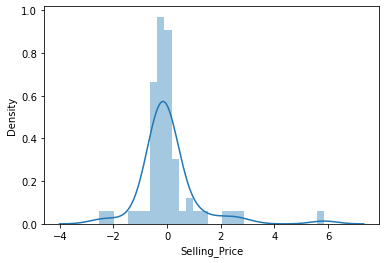

In [56]:
sns.distplot(y_test-predictions)

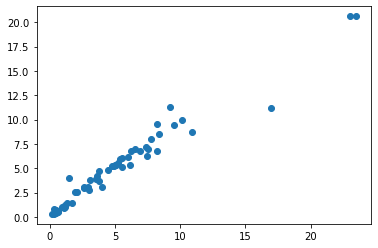

In [57]:
plt.scatter(y_test,predictions)

## 6.0 Metrics(errors)
- mean_absolute_error
- mean_squared_error
- root_mean_square_error

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6039047540983605
MSE: 1.2417214009491793
RMSE: 1.1143255363443751


#### 6.1 Save your predicted data into pickle file

In [60]:
import pickle
# open a file, where you ant to store the data
file = open('Car_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)